In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '/home/swei20/PIML/PIMLgrid/'
import sys
sys.path.insert(0, PROJECT_PATH)
[sys.path.append(i) for i in ['.', '..']]

[None, None]

In [5]:
import os
env_vars = !cat /home/swei20/PIML/PIMLspec/.env
for var in env_vars:
    key, value = var.split('=')
    os.environ[key] = value

In [6]:
import numpy as np
import copy
import matplotlib.pyplot as plt


In [5]:
from test.dataloader import TestDataLoader

In [79]:
from grid.interface.gateway.gridprocessIF import StellarGridProcessIF

In [80]:
PIF = StellarGridProcessIF()

In [81]:
PARAM = {"box_name":"R"}

In [82]:
PIF.interact(PARAM)

In [83]:
PIF.Object.__dict__

{'coord': array([[-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01, -2.50e-01],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  0.00e+00],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  2.50e-01],
        ...,
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  0.00e+00],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  2.50e-01],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  5.00e-01]]),
 'value': array([[ 452360.,  534990.,  622660., ...,  449380.,  446190.,  441060.],
        [ 448560.,  526930.,  621180., ...,  449760.,  445200.,  438250.],
        [ 446380.,  520800.,  621030., ...,  450240.,  444140.,  435130.],
        ...,
        [2231600., 2507600., 2782400., ...,  651560.,  638910.,  627310.],
        [2225600., 2477200., 2787900., ...,  653220.,  637980.,  623120.],
        [2231400., 2459300., 2804900., ...,  655510.,  637420.,  619060.]]),
 'unit_coord': array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.     

In [27]:
        PHYTICK = [0.25, 250, 0.5, 0.25, 0.25]


In [78]:
Object.deunify([0,0,0,0,0])

array([-1.0e+00,  5.5e+03,  2.0e+00, -7.5e-01, -2.5e-01])

In [77]:
Object.interpolator(np.array([[0,0,0,0,0]]), scale=False)

array([[451572.60841036, 536152.14444375, 625241.00004315, ...,
        449337.10055457, 445996.63966845, 440864.33570299]])

In [74]:
Object.builder.base_interpolator([[0,0,0,0,0]])

array([[451572.60841036, 536152.14444375, 625241.00004315, ...,
        449337.10055457, 445996.63966845, 440864.33570299]])

In [28]:
def eval_interpolator(Object, axis = 1):


In [85]:
Object = PIF.Object
axis=1

In [71]:
Object.interpolator([0,0,0,0,0])

array([-1.09029559e+09, -8.53917102e+08, -3.24234721e+08, ...,
       -2.78722383e+07, -4.91502171e+07, -2.71463132e+07])

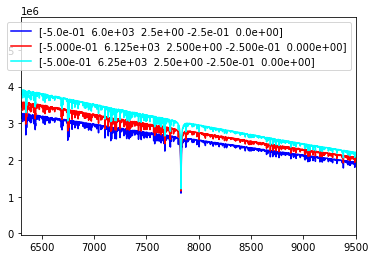

In [89]:
pmt0 = Object.box["mid"]
pmt2 = np.copy(pmt0)
pmt2[axis] += PHYTICK[axis]
pmt1 = 0.5 * (pmt0 + pmt2)

flux0 = Object.get_coord_value(pmt0)
flux2 = Object.get_coord_value(pmt2)
flux1 = Object.interpolator(pmt1)

wave = np.arange(len(flux0))
plt.plot(wave, flux0, label= pmt0, c='b')
plt.plot(wave, flux1, label = pmt1, c='r')
plt.plot(wave, flux2, label = pmt2, c='cyan')
plt.xlim(6300, 9500)
plt.legend()

In [61]:
flux0

array([ 887990., 1037700., 1196700., ...,  531260.,  523700.,  512920.])

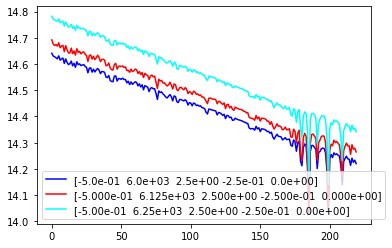

In [36]:
pmt0 = Object.box["mid"]
pmt2 = np.copy(pmt0)
pmt2[axis] += PHYTICK[axis]
pmt1 = 0.5 * (pmt0 + pmt2)

flux0 = Object.get_coord_value(pmt0)
flux2 = Object.get_coord_value(pmt2)
flux1 = Object.interpolator(pmt1)

wave = np.arange(len(flux0))
plt.plot(wave, flux0, label= pmt0, c='b')
plt.plot(wave, flux1, label = pmt1, c='r')
plt.plot(wave, flux2, label = pmt2, c='cyan')
plt.legend()

In [35]:
flux0.shape

(220,)

In [29]:
eval_interpolator(PIF.Object)

TypeError: arange: scalar arguments expected instead of a tuple.